# Aula 01 - Procon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Carregando dados de reclamações

Vou usar o Pandas para carregar e concatenar todos os arquivos de reclamações dos anos de 2012 até 2016 em uma única tabela.

A coluna `CEPConsumidor` gera problemas se deixarmos o Pandas decidir sozinho o tipo de dados a ser usado. Para resolver isso, eu mesmo defini o tipo da coluna como sendo uma string. Depois disso, ainda substituo valores onde ele carregou como `NaN` por uma string vazia `''`.

In [28]:
procon = pd.concat([
        pd.read_csv("./procon/reclamacoes-fundamentadas-sindec-2012.csv", encoding="utf-8", dtype={'CEPConsumidor': np.str}),
        pd.read_csv("./procon/reclamacoes-fundamentadas-sindec-2013.csv", encoding="utf-8", dtype={'CEPConsumidor': np.str}),
        pd.read_csv("./procon/reclamacoes-fundamentadas-sindec-2014.csv", encoding="utf-8", dtype={'CEPConsumidor': np.str}),
        pd.read_csv("./procon/reclamacoes-fundamentadas-sindec-2015.csv", encoding="utf-8", dtype={'CEPConsumidor': np.str}),
        pd.read_csv("./procon/reclamacoes-fundamentadas-sindec-2016.csv", encoding="utf-8", dtype={'CEPConsumidor': np.str})
], ignore_index=True)

In [93]:
procon["CEPConsumidor"] = procon["CEPConsumidor"].replace(np.nan, '')
procon['DataArquivamento'] = pd.to_datetime(procon["DataArquivamento"])
procon['DataAbertura'] = pd.to_datetime(procon["DataAbertura"])


In [100]:
def print_kv(k, v):
    print("\x1b[47m{}\x1b[0m\n{}".format(k, v))
print_kv("\n== Colunas e tipos de dados ==", procon.dtypes)



== Colunas e tipos de dados ==
AnoCalendario                     int64
DataArquivamento         datetime64[ns]
DataAbertura             datetime64[ns]
CodigoRegiao                      int64
Regiao                           object
UF                               object
strRazaoSocial                   object
strNomeFantasia                  object
Tipo                              int64
NumeroCNPJ                      float64
RadicalCNPJ                     float64
RazaoSocialRFB                   object
NomeFantasiaRFB                  object
CNAEPrincipal                   float64
DescCNAEPrincipal                object
Atendida                         object
CodigoAssunto                     int64
DescricaoAssunto                 object
CodigoProblema                  float64
DescricaoProblema                object
SexoConsumidor                   object
FaixaEtariaConsumidor            object
CEPConsumidor                    object
dtype: object


In [101]:
print_kv("\n== Resumo de colunas numéricas ==", procon.select_dtypes(include=['int64', 'float64']).describe())



== Resumo de colunas numéricas ==
       AnoCalendario  CodigoRegiao          Tipo    NumeroCNPJ   RadicalCNPJ  \
count   1.206072e+06  1.206072e+06  1.206072e+06  1.153518e+06  1.152390e+06   
mean    2.013977e+03  2.923363e+00  9.972033e-01  2.512817e+13  7.722663e+07   
std     1.344861e+00  1.149968e+00  5.280969e-02  2.657361e+13  1.802320e+09   
min     2.012000e+03  1.000000e+00  0.000000e+00  1.910000e+02  0.000000e+00   
25%     2.013000e+03  2.000000e+00  1.000000e+00  4.164616e+12  4.169843e+06   
50%     2.014000e+03  3.000000e+00  1.000000e+00  1.083593e+13  1.083593e+07   
75%     2.015000e+03  3.000000e+00  1.000000e+00  4.344704e+13  4.344704e+07   
max     2.016000e+03  5.000000e+00  1.000000e+00  9.867000e+13  9.996934e+10   

       CNAEPrincipal  CodigoAssunto  CodigoProblema  
count   1.133380e+06   1.206072e+06    1.206052e+06  
mean    5.431158e+06   1.326821e+02    1.179065e+02  
std     1.615987e+06   6.790425e+01    5.669227e+01  
min     1.156000e+05   1.000

In [102]:
print_kv("\n== Resumo de colunas literais ==", procon.select_dtypes(include=['object']).describe())



== Resumo de colunas literais ==
         Regiao       UF           strRazaoSocial strNomeFantasia  \
count   1206072  1206072                  1206064         1006636   
unique        5       26                   121636           85712   
top     Sudeste       SP  TELEMAR NORTE LESTE S/A              OI   
freq     424311   206059                    18242           17758   

                 RazaoSocialRFB NomeFantasiaRFB  \
count                   1137442          547639   
unique                    69883           43905   
top     TELEMAR NORTE LESTE S/A              OI   
freq                      29703           58425   

                               DescCNAEPrincipal Atendida  \
count                                    1122261  1206072   
unique                                       950        2   
top     BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL        S   
freq                                      113385   750698   

                                         DescricaoAssunto 

In [104]:
print_kv("\n== Resumo de colunas de data ==", procon.select_dtypes(include=['datetime64[ns]']).describe())



== Resumo de colunas de data ==
           DataArquivamento         DataAbertura
count               1206072              1206072
unique               754395               975105
top     2015-12-31 00:00:00  2015-11-19 00:56:46
freq                   1507                  201
first   2012-01-01 00:00:00  2005-03-31 11:28:08
last    2016-12-30 15:17:40  2016-12-28 14:22:46


### Objetivo

Quero saber quais são as empresas mais odiadas.

Mas especificamente, vou tentar agrupar as reclamações feitas por empresa e depois ordenar as que possuem maior número de reclamações.

Depois vou ordenar as empresas pela média de tempo que uma reclamação fica aberta. Acho que essa deve ser uma boa métrica de ódio.


##### Ordenando as empresas por quantidade de reclamações totais

Essa não é bem uma boa métrica, pois empresas maiores provavelmente possuem mais reclamações. Mesmo assim, vou usar isso para poder visualizar como as top em número de reclamações evoluem no tempo com relação ao número de reclamações mensais.

In [148]:
grp_empresas = procon.groupby(['strRazaoSocial'])
top_empresas = grp_empresas['strRazaoSocial'].count().sort_values(ascending=False).head(40)
print_kv("\n== Agrupando por Razão Social ==", top_empresas)



== Agrupando por Razão Social ==
strRazaoSocial
TELEMAR NORTE LESTE S/A                                  18242
SAMSUNG ELETRONICA DA AMAZONIA LTDA                      14676
TNL PCS S/A                                              10286
CLARO S.A.                                                9750
CAIXA ECONOMICA FEDERAL                                   9230
CLARO S/A                                                 9089
ELECTROLUX DO BRASIL S/A                                  8361
SKY BRASIL SERVICOS LTDA                                  7997
TIM CELULAR S/A                                           7460
TELEFONICA BRASIL S/A                                     7418
MOTOROLA INDUSTRIAL LTDA                                  7280
DIGIBRAS INDUSTRIA DO BRASIL S/A                          7233
VIA VAREJO S/A                                            7230
MAGAZINE LUIZA S/A                                        6835
TIM CELULAR S.A.                                          6769
NOKIA 

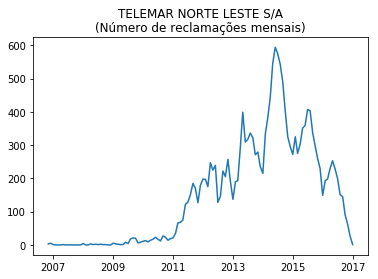

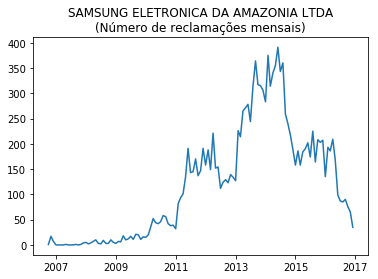

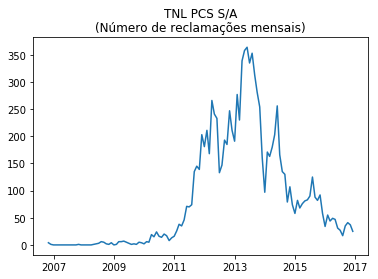

In [161]:
for name in top_empresas.index[0:3]:
    grp_datas1 = grp_empresas.get_group(name).groupby(pd.Grouper(key='DataAbertura', freq='M'))
    cnt_series = grp_datas1["DataAbertura"].count()
    #print(cnt_series.cumsum())
    plt.plot(cnt_series.index.values, cnt_series.values)
    plt.title("{}\n(Número de reclamações mensais)".format(name))
    plt.show()

Como se pode ver a taxa de novas reclamações das 3 top empresas mais reclamadas possuem um pico em torno de 2013 e 2014.

##### Gráficos do número total de reclamações em aberto em dado mês

Para calcular isso terei de adicionar 1 nas datas de abertura das reclamações e subtrair 1 nas datas de fechamento das reclamações. Vou fazer isso para as top em números de reclamações, pois como eu disse anteriormente, são empresas grandes.

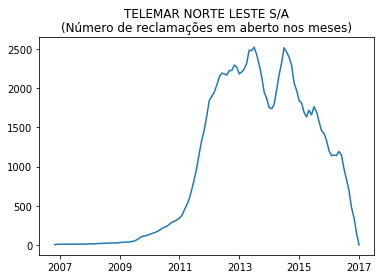

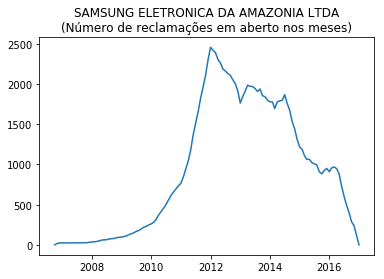

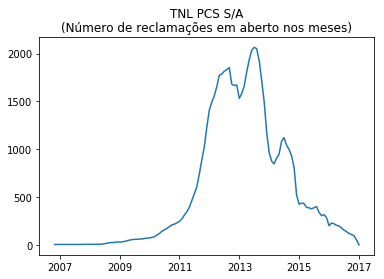

In [171]:
for name in top_empresas.index[0:3]:
    grp_datas1 = grp_empresas.get_group(name).groupby(pd.Grouper(key='DataAbertura', freq='M'))
    grp_datas2 = grp_empresas.get_group(name).groupby(pd.Grouper(key='DataArquivamento', freq='M'))
    cnt_series1 = grp_datas1["DataAbertura"].count()
    cnt_series2 = grp_datas2["DataArquivamento"].count()
    combined = cnt_series1.combine(cnt_series2, lambda a,b: a-b, fill_value=0)
    #print(combined.cumsum())
    #print(cnt_series2.cumsum())
    plt.plot(combined.index.values, combined.values.cumsum())
    plt.title("{}\n(Número de reclamações em aberto nos meses)".format(name))
    plt.show()

Como a contagem de reclamações em aberto cai para zero em todos os casos, eu suponho que esse data-set é composto apenas de reclamações que foram abertas e concluidas. Não há reclamações que nunca foram concluidas, nem reclamações cuja abertura não tenha sido registrada.

Essa métrica já fica mais perto de um indicador de ódio, mas ainda assim, não é perfeita pois quanto mais clientes, maior o valor absoluto. Entretanto, já podemos ter uma ideia se a empresa dá conta de atender as reclamações ou não. 

##### Gráficos da média de tempo das reclamações em aberto em dado mês

Para cada mês vou ver todas as reclamações em aberto, e então fazer uma média dos tempos decorridos.

In [205]:
for name in top_empresas.index[0:1]:
    grp = grp_empresas.get_group(name).sort_values(by=["DataAbertura"])
    
    cumsums = []
    cnts = []
    i = 0
    for row_index, row in grp.iterrows():
        row_range = pd.date_range(row["DataAbertura"], row["DataArquivamento"] + pd.offsets.MonthOffset(1), freq='1M')
        ones = pd.Series(data=1, index=row_range)
        cumsums.append(ones.cumsum())
        cnts.append(ones)
        if (i % 1000 == 0):
            print("row {} of {}".format(i, len(grp_empresas)))
        i += 1
    
    # TODO: Agora eu teria que combinar todas as séries,
    # TODO: mas simplesmente demora muito pra concluir a tarefa,
    # TODO: e eu não sei outra forma mais eficiente de fazer isso.
    
    
    # Depois, teria que combinar `cumsums` com `cnts`,
    # dividindo o valor da primeira pela segunda.
    resultado = all_cumsums.combine(all_cnts, lambda s,c: s/c, fill_value=np.NaN)

row 0 of 121636
row 1000 of 121636
row 2000 of 121636
row 3000 of 121636
row 4000 of 121636
row 5000 of 121636
row 6000 of 121636
row 7000 of 121636
row 8000 of 121636
row 9000 of 121636
row 10000 of 121636
row 11000 of 121636
row 12000 of 121636
row 13000 of 121636
row 14000 of 121636


KeyboardInterrupt: 